In [1]:
from google.colab import files
uploaded=files.upload()

Saving haberman.csv to haberman.csv


(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')
age  year  nodes  status
61   59    0      1         3
38   60    0      1         2
54   62    0      1         2
63   63    0      1         2
57   64    0      1         2
                           ..
56   66    1      1         1
     65    9      2         1
55   69    22     1         1
           3      1         1
30   62    3      1         1
Length: 289, dtype: int64
1    225
2     81
Name: status, dtype: int64


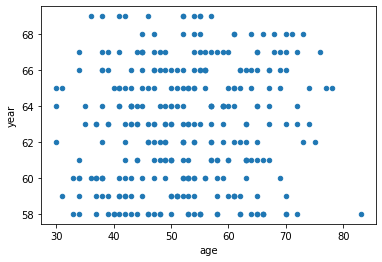

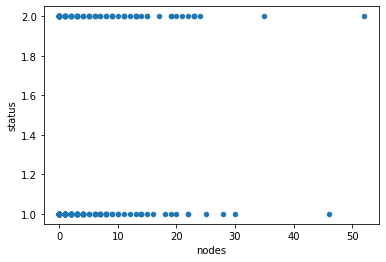

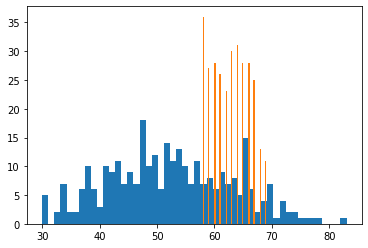

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#with open(~/bhaswati/'haberman.csv','r') as f:
import io
haberman=pd.read_csv(io.BytesIO(uploaded['haberman.csv']))
 # (Q) how many data-points and features?
print(haberman.shape)
 #(Q) What are the column names in our dataset?
print(haberman.columns)
#(Q) How many data points for each class are present?
print(haberman.value_counts())
print(haberman['status'].value_counts())
#2D scatter plot (bivariate)
haberman.plot(kind='scatter', x='age', y='year') ;
plt.show()
haberman.plot(kind='scatter', x='nodes', y='status') ;
plt.show()
# What about 1-D scatter plot using just one feature (univariate)?
#1-D scatter plot of age 
#print(haberman["age"])
x1=haberman["age"]
x2=haberman["year"]
x3=haberman["status"]
plt.hist(x1, bins=50)
plt.hist(x2, bins=50)
plt.show()

#Observation 
In this dataset total 306 datapoints are divided into two classes. Status (survival status) 1,  means patients survived, and status 2  means patients died. In this set 225 data points for patients survived and 81 data points for patients who died. 

In [ ]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


#Observations:
Mean age of patients was 52.
75% of the patients have 4 nodes affected. Even though the max number of affected nodes are 52. This means a small 
percentage of patients are contributing to this high number of affected lymph nodes.
Best outcome of treatment was between year '60 and '63.

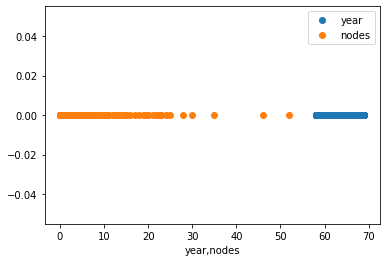

In [ ]:
#univariate analysis
plt.plot(haberman["year"],np.zeros_like(haberman["year"]),'o',label='year')
plt.plot(haberman["nodes"],np.zeros_like(haberman["nodes"]),'o',label='nodes')
plt.xlabel('year,nodes')
plt.legend()

#Observations:
People recieved treatment after 60s. 
Number of nodes rapidly grew from 0 to 52.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


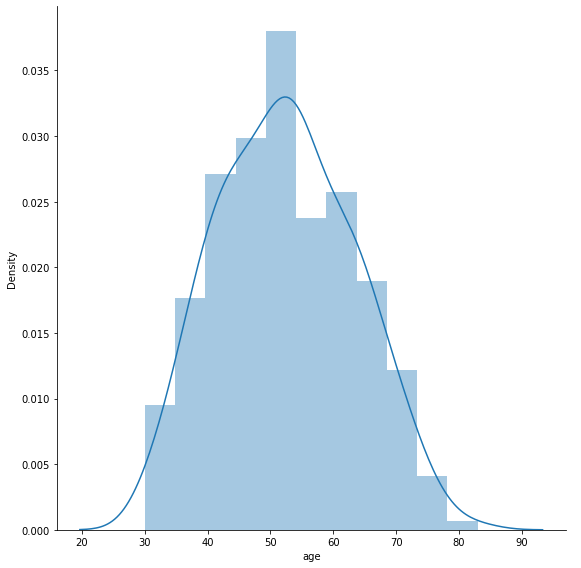

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


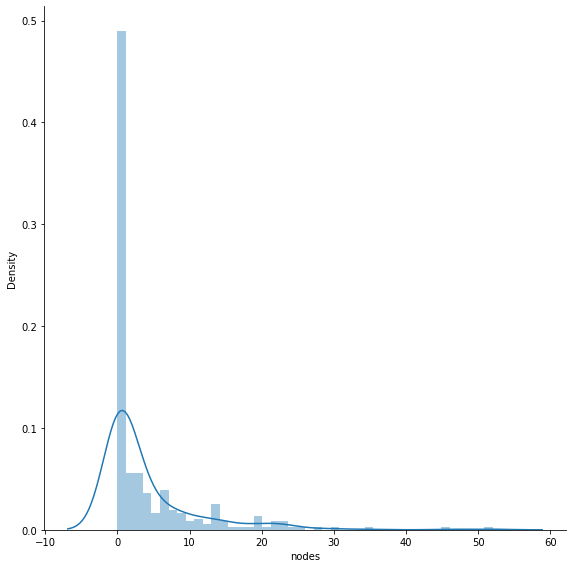

In [ ]:
sns.FacetGrid(haberman, size=8) \
.map(sns.distplot, "age") \
.add_legend();
plt.show()
sns.FacetGrid(haberman, size=8) \
.map(sns.distplot, "nodes") \
.add_legend();
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


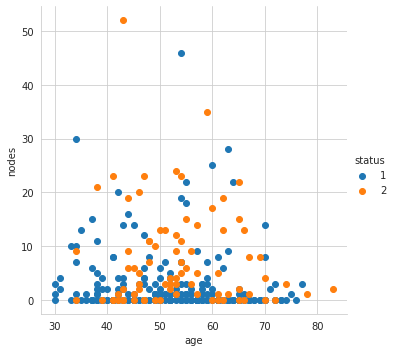

In [ ]:
#Bivariate Analysis
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue='status',size=5) \
.map(plt.scatter, "age","nodes") \
.add_legend(); 
plt.show();
#almost all ages have most probable noes at lower values.

#Observations:
Almost all ages have most probable nodes at lower values (0-5). These features can be good candidate for calssification. There can be a correlation between advanced age and higher number of nodes, and its impact on status of survival can be explored.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


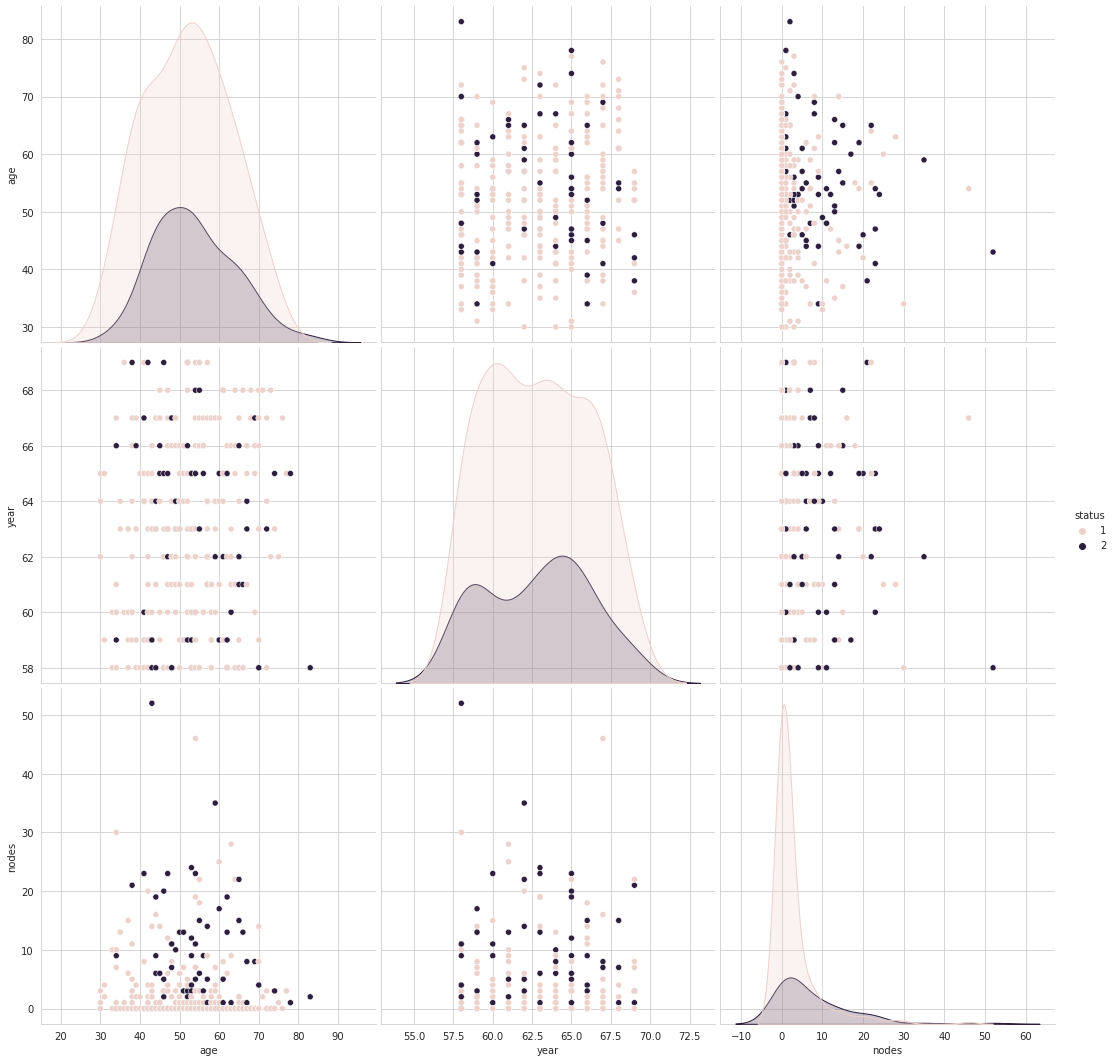

In [ ]:
#multivariate analysis
sns.set_style("whitegrid");
sns.pairplot(haberman, hue='status', size=5);
plt.show()

#Observation
From the probability density and pair plots it can be seen that the mean age of affected people is 52. The dsitribution of years of treatment shows a broad range of values, but most patients died around year '64. Around the year '60 most people survived. From the 'age' and 'nodes' plot we can see, people between age range 40-70 has high numbers of affected nodes. From the last pair plot of distribution of nodes, its evident that nodes are very important feature of making a difference in the outcome. The distrubution of nodes for people who survived (light pink) is peaked around 1 and sharply falls like  probability~exp(-const.nodes). This 'const' is an important determining factor. Patients who died have a different statistics, having a mean number of nodes around 3, but the fat tail of the distribution tells us there can be other factors (possibly coupled with 'nodes' gave rise to such a distribution.

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


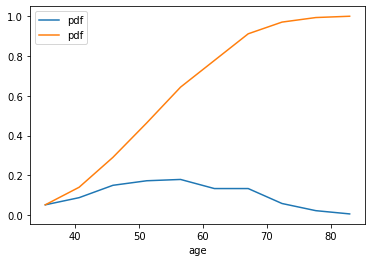

In [3]:
#what percentage of people lower than 50 have survived
counts, bin_edges = np.histogram(haberman['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf); 
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf');
plt.plot(bin_edges[1:],cdf,label='pdf')
plt.xlabel('age')
plt.legend()

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


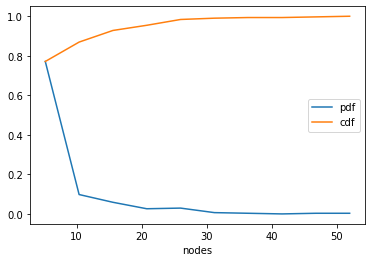

In [4]:
counts, bin_edges = np.histogram(haberman['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf); 
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf');
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel('nodes')
plt.legend()

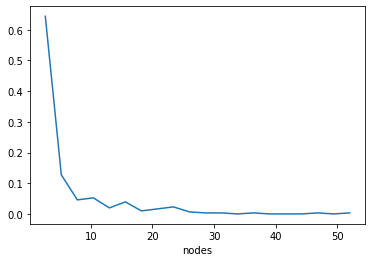

In [12]:
 counts, bin_edges = np.histogram(haberman['nodes'], bins=20, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.xlabel('nodes')
plt.show();

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


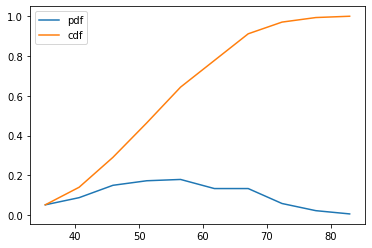

In [ ]:
counts, bin_edges = np.histogram(haberman['age'], bins=10, density = True)
pdf = counts/(sum(counts)) 
print(pdf); 
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf) 
plt.plot(bin_edges[1:],pdf,label='pdf') 
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.legend()
plt.show();

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


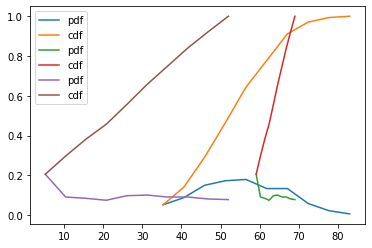

In [ ]:
counts, bin_edges = np.histogram(haberman['age'], bins=10, density = True)
pdf = counts/(sum(counts)) 
print(pdf); 
print(bin_edges)
cdf = np.cumsum(pdf) 
plt.plot(bin_edges[1:],pdf,label='pdf') 
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.legend()
counts, bin_edges = np.histogram(haberman['year'], bins=10, density = True)
pdf = counts/(sum(counts)) 
print(pdf); 
print(bin_edges)
cdf = np.cumsum(pdf) 
plt.plot(bin_edges[1:],pdf,label='pdf') 
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.legend()
counts, bin_edges = np.histogram(haberman['nodes'], bins=10, density = True)
#pdf = counts/(sum(counts)) 
#print(pdf); 
#print(bin_edges)
cdf = np.cumsum(pdf) 
plt.plot(bin_edges[1:],pdf,label='pdf') 
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.legend()
plt.show();

In [ ]:
print("Means:") 
print(np.mean(haberman["age"]))
#Mean with an outlier. 
print(np.mean(np.append(haberman["age"],50))); 
print(np.mean(haberman["nodes"]))
print(np.mean(haberman["year"]))
print("\nStd-dev:"); 
print(np.std(haberman["age"])) 
print(np.std(haberman["nodes"])) 
print(np.std(haberman["year"]))
 

Means:
52.45751633986928
52.44951140065147
4.026143790849673
62.85294117647059

Std-dev:
10.78578520363183
7.177896092811152
3.244090833563246


In [ ]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:") 
print(np.median(haberman["age"]))
print(np.median(haberman["year"])) 
print(np.median(haberman["nodes"]))
print("\nQuantiles:") 
print(np.percentile(haberman["age"],np.arange(0, 100, 25))) 
print(np.percentile(haberman["year"],np.arange(0, 100, 25))) 
print(np.percentile(haberman["nodes"], np.arange(0, 100, 25)))
print("\n90th Percentiles:") 
print(np.percentile(haberman["age"],90)) 
print(np.percentile(haberman["year"],90)) 
print(np.percentile(haberman["nodes"], 90))
from statsmodels import robust
print ("\nMedian Absolute Deviation") 
print(robust.mad(haberman["age"])) 
print(robust.mad(haberman["nodes"])) 
print(robust.mad(haberman["year"]))


Medians:
52.0
63.0
1.0

Quantiles:
[30.   44.   52.   60.75]
[58.   60.   63.   65.75]
[0. 0. 1. 4.]

90th Percentiles:
67.0
67.0
13.0

Median Absolute Deviation
11.860817748044816
1.482602218505602
4.447806655516806


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


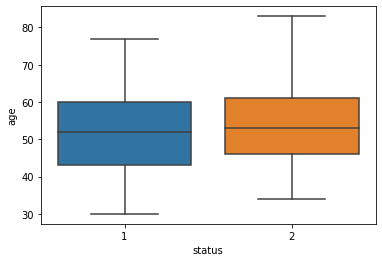

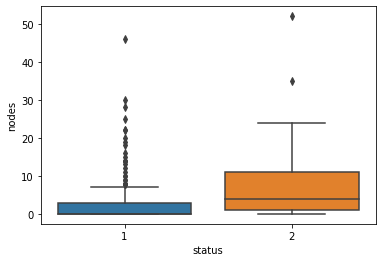

In [ ]:
#Box-plot to summarise data
sns.boxplot(x='status',y='age', data=haberman) 
plt.show()
sns.boxplot(x='status',y='nodes', data=haberman) 
plt.show()

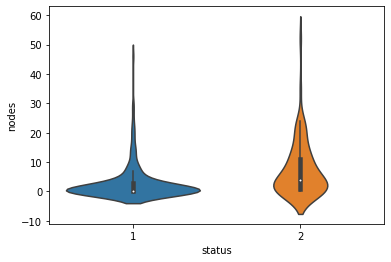

In [ ]:
 # Denser regions of the data are fatter, and sparser ones thinner #in a violin plot
sns.violinplot(x="status", y="nodes", data=haberman, size=8) 
plt.show()

Box plots and violin plots summarises the data. In summary, compared to age, number of affected lymph nodes have been a factor which influenced the outcome of survival status.

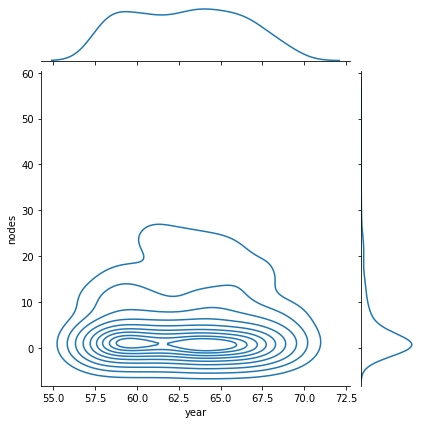

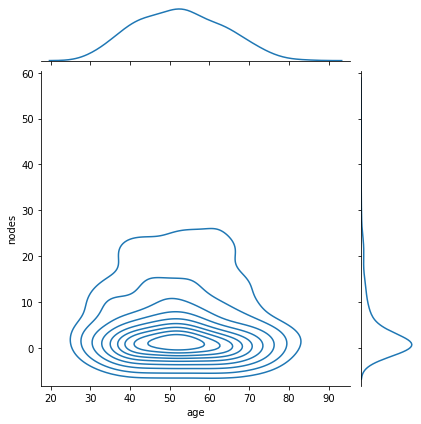

In [14]:

#2D Density plot, contours-plot
sns.jointplot(x="year", y="nodes", data=haberman, kind="kde"); 
plt.show();
#2D Density plot, contours-plot
sns.jointplot(x="age", y="nodes", data=haberman, kind="kde"); 
plt.show();

Observation
Contour plots are isolines of probabilities depending on two variables here, year and nodes. First contour plot between nodes vs year shows an interesting feature, i.e. two extremums for same number of nodes at different time point. As expected, when plotted with age as x-axis, contour plot shows one extremum corresponding to the median age 52. However for both of the plots the broadening of countour along the nodes axis shows a higher probability of having a high number of nodes, probably contributed by same set of patients. Which means once the patients started having high number of nodes, although number of such patients are small, they developed higher number of nodes. Besides this observation is pronounced in case of  patients who did not survive (observation from pairplot).

In [ ]:
haberman_1 = haberman.loc[haberman["status"] == "2"]
haberman_2 = haberman.loc[haberman["status"] == "1"];
print(haberman_1)
haberman_1_SW = haberman_1.iloc[:,3]
haberman_2_SW = haberman_2.iloc[:,3]
#print(habermnan_2_SW)
#iris_versicolor_SW = iris_versicolor.iloc[:,1]
from scipy import stats 
#stats.ks_2samp(haberman_1_SW, haberman_2_SW)
x = stats.norm.rvs(loc=0.2, size=10) 
stats.kstest(x,'norm')
x = stats.norm.rvs(loc=0.2, size=100) 
stats.kstest(x,'norm')
x = stats.norm.rvs(loc=0.2, size=1000) 
stats.kstest(x,'norm')

Empty DataFrame
Columns: [age, year, nodes, status]
Index: []


KstestResult(statistic=0.07241778779494634, pvalue=5.254721371083039e-05)

In [ ]:
haberman.loc[haberman["status"] == "1"]
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
#Create a profile report
!pip3 install pandas_profiling --upgrade

In [ ]:
from pandas_profiling import ProfileReport
profile=ProfileReport(haberman,explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Spearmans correlation is very high between nodes and status, indicates that nodes is most important determining factor of the outcome.